In [1]:
import arviz as az
import numpy as np

import pymc as pm
import aesara.tensor as at

WARNING (aesara.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [4]:
E11 = 1000
N11 = 400

In [6]:
with pm.Model() as m:
    Mix_p = pm.Uniform('Mix_p', 0, 1)
    
    alpha1 = pm.Exponential('alpha1', lam=0.2)
    beta1 = pm.Exponential('beta1', lam=0.1)
    
    alpha2 = pm.Exponential('alpha2', lam=2)
    beta2 = pm.Exponential('beta2', lam=4)

    # g1_dist = pm.Gamma.dist(alpha=alpha1, beta=beta1)
    # g2_dist = pm.Gamma.dist(alpha=alpha2, beta=beta2)
    # lmbda = pm.Mixture('lmbda', w = [Mix_p, 1-Mix_p], comp_dists = [g1_dist, g2_dist])

    comp1_dist = pm.BetaBinomial.dist(n=E11, alpha=alpha1, beta=beta1)
    comp2_dist = pm.BetaBinomial.dist(n=E11, alpha=alpha2, beta=beta2)
    obs = pm.Mixture('obs', w = [Mix_p, 1-Mix_p], comp_dists = [comp1_dist, comp2_dist], observed=N11)
    idata = pm.sample()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [Mix_p, alpha1, beta1, alpha2, beta2]
WARNING (aesara.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
WARNING (aesara.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
WARNING (aesara.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
WARNING (aesara.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 24 seconds.


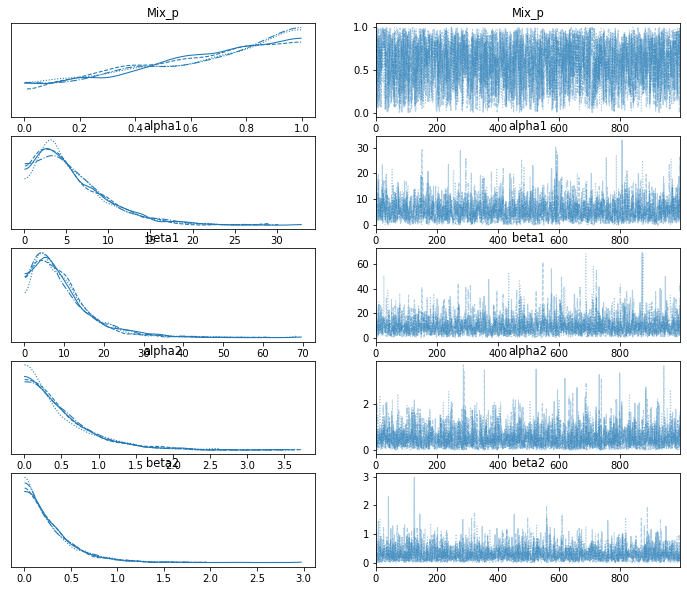

In [8]:
az.plot_trace(idata);